In [213]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [214]:
merged_df = pd.read_csv('merged_df.csv')
merged_df.head()

,ID,Gender,Car,Property,Children,Income,Income status,Education,Marital,Housing,...,Job,Family,0,1,2,3,4,5,C,X
0,5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN
2,5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
3,5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
4,5001715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0


In [215]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               45985 non-null  int64  
 1   Gender           36457 non-null  object 
 2   Car              36457 non-null  object 
 3   Property         36457 non-null  object 
 4   Children         36457 non-null  float64
 5   Income           36457 non-null  float64
 6   Income status    36457 non-null  object 
 7   Education        36457 non-null  object 
 8   Marital          36457 non-null  object 
 9   Housing          36457 non-null  object 
 10  Day since birth  36457 non-null  float64
 11  Days employed    36457 non-null  float64
 12  Mobile           36457 non-null  float64
 13  Work phone       36457 non-null  float64
 14  Phone            36457 non-null  float64
 15  Email            36457 non-null  float64
 16  Job              25134 non-null  object 
 17  Family      

In [216]:
merged_df.Mobile.unique()

array([nan,  1.])

In [217]:
merged_df = merged_df.drop(['ID', 'Mobile'], axis = 1)

Rather than analysing the overdue status directly, we may want to identify clients with high chance of bad debt.

We can group everyone with only status 0  in their history as clients with low chance of bad debt, as these overdues are fairly common. Anyone with 

status 1 or higher in their credit history can be classified as high chance.

In [218]:
import math

merged_df['Bad debt Chance'] = merged_df.iloc[:,17:-2].sum(axis=1, min_count=1)
merged_df['Bad debt Chance'] = merged_df['Bad debt Chance'].apply(lambda x: 'low' if (x == 0 or math.isnan(x)) else 'high')

merged_df['Bad debt Chance'].value_counts()

Bad debt Chance
low     40635
high     5350
Name: count, dtype: int64

In [219]:
merged_df = merged_df.drop(merged_df.iloc[:,16:-1].columns, axis = 1)

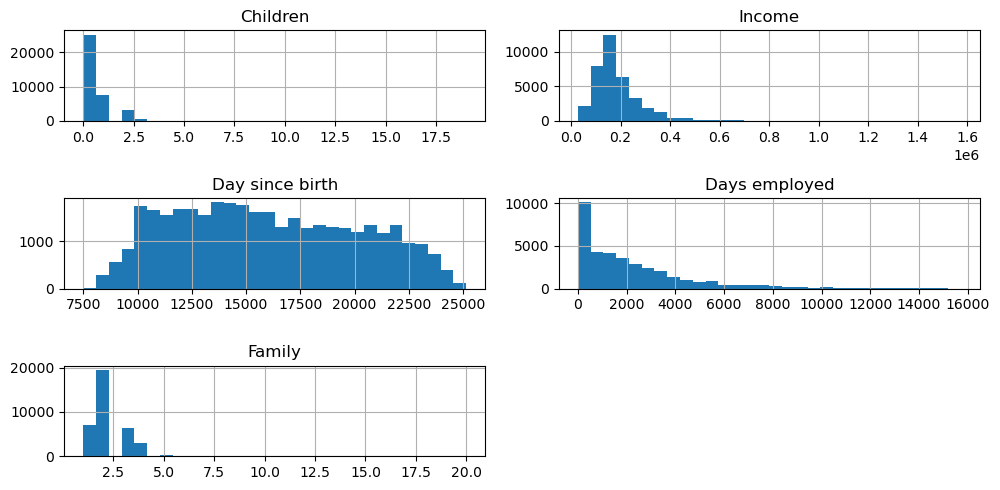

In [220]:
merged_df.drop(['Work phone', 'Phone', 'Email'], axis = 1).hist(bins=30, figsize=(10, 5))
plt.tight_layout()

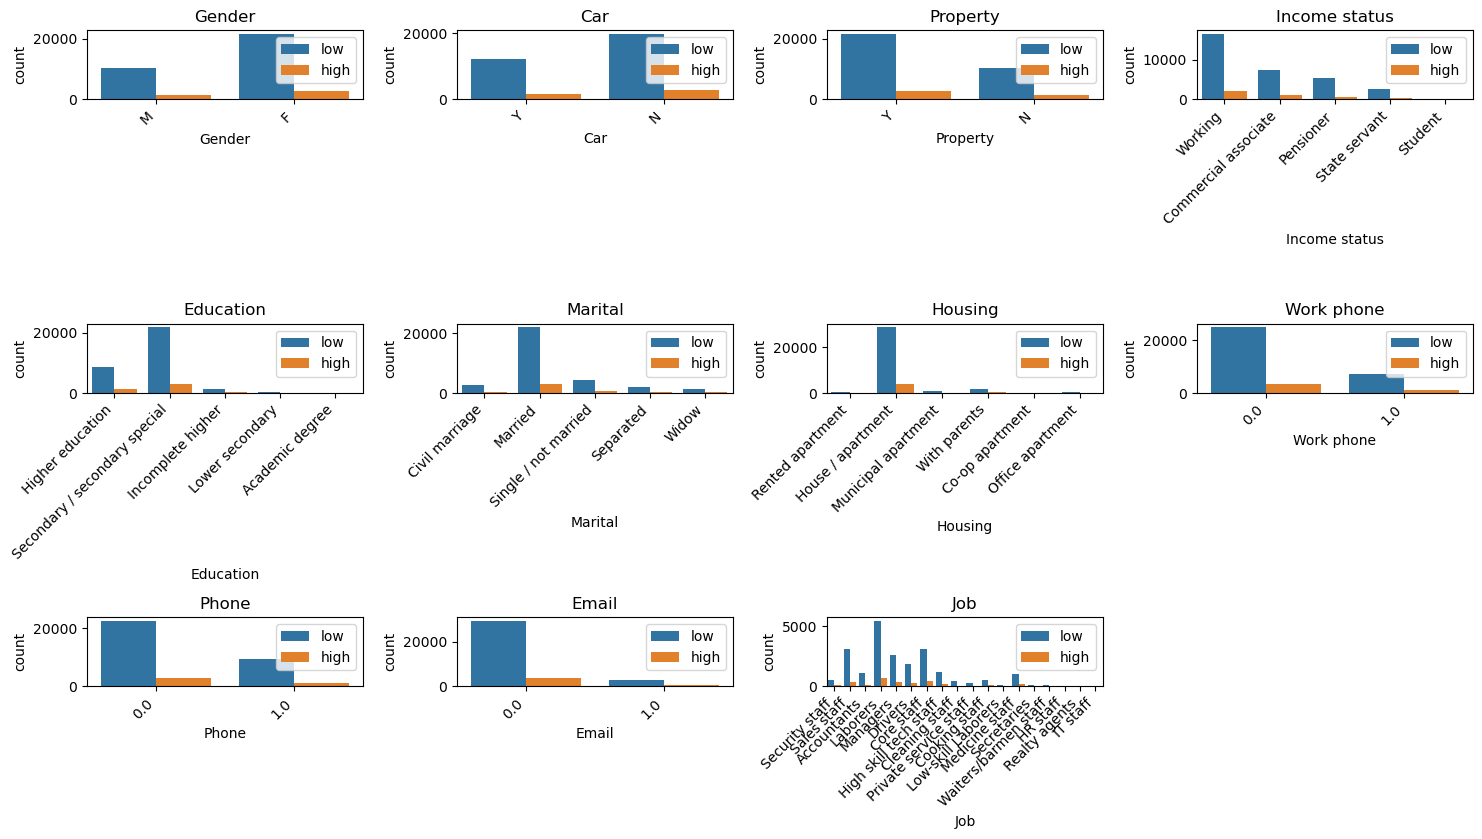

In [228]:
features = ['Gender', 'Car', 'Property', 'Income status', 'Education', 'Marital', 'Housing', 'Work phone', 'Phone', 'Email', 'Job']
plt.figure(figsize=(15, 10))
for feature in features:
    plt.subplot(4, 4, features.index(feature) + 1)
    sns.countplot(data=merged_df, x=feature, hue = 'Bad debt Chance', hue_order=['low', 'high'])
    plt.xticks(rotation=45, ha='right')
    plt.title(feature)
    plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Axes: >

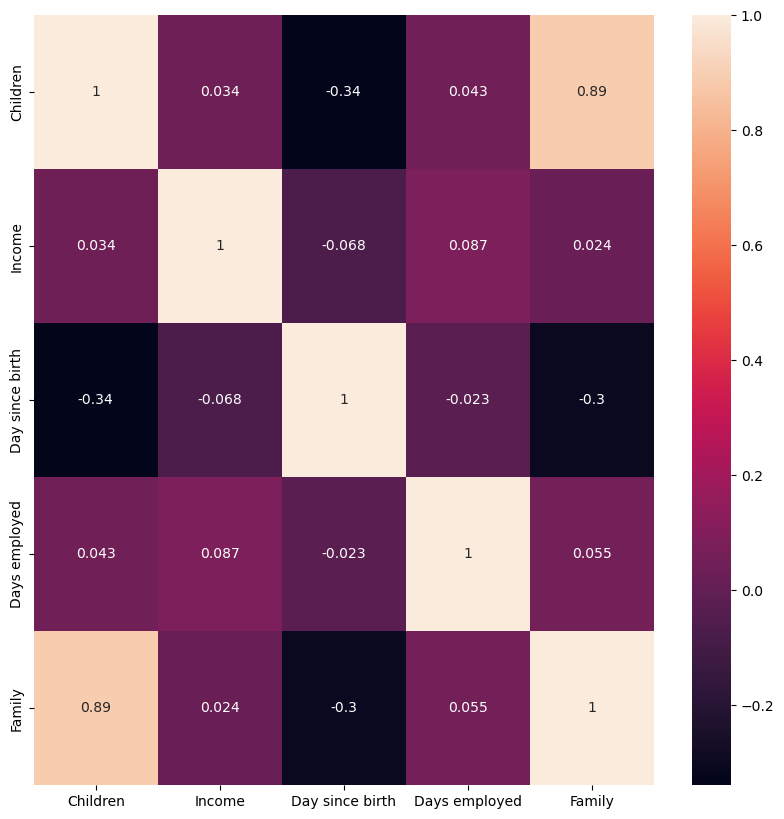

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
sns.heatmap(merged_df.select_dtypes(include =['float64', 'int64']).drop(['Email', 'Phone', 'Work phone'], axis = 1).corr(), annot = True)